In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("tv_shows.csv")
#df = pd.read_csv("movies.csv")

# Display the first 5 rows of the DataFrame
df.head()


,primary_title,premiered,title_id,nudity,violence,profanity,alcohol,frightening
0,Caprica,2009,tt0799862,Moderate,Moderate,Moderate,Mild,Moderate
1,Eastbound & Down,2009,tt0866442,Severe,Mild,Severe,Severe,Mild
2,United States of Tara,2009,tt1001482,Moderate,Mild,Severe,Moderate,Mild
3,Party Down,2009,tt1073507,Moderate,Mild,Severe,Moderate,None
4,Big Time Rush,2009,tt1131746,None,None,None,None,None


In [2]:
# Replace severity with numeric weights
wdf = df.replace({'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3})
wdf.head()

,primary_title,premiered,title_id,nudity,violence,profanity,alcohol,frightening
0,Caprica,2009,tt0799862,2.0,2.0,2.0,1.0,2.0
1,Eastbound & Down,2009,tt0866442,3.0,1.0,3.0,3.0,1.0
2,United States of Tara,2009,tt1001482,2.0,1.0,3.0,2.0,1.0
3,Party Down,2009,tt1073507,2.0,1.0,3.0,2.0,0.0
4,Big Time Rush,2009,tt1131746,0.0,0.0,0.0,0.0,0.0


In [3]:
# Advisory ratings grouped by year
summary = wdf.groupby('premiered').agg(
    nudity=("nudity", "mean"),
    violence=("violence", "mean"),
    profanity=("profanity", "mean"),
    alcohol=("alcohol", "mean"),
    frightening=("frightening", "mean")
)
summary

,nudity,violence,profanity,alcohol,frightening
premiered,,,,,
2009,1.229167,1.375000,1.511111,1.319149,1.130435
2010,1.220000,1.444444,1.395833,1.111111,1.325581
2011,1.352941,1.603175,1.656250,1.406780,1.464286
2012,1.241379,1.607143,1.351852,1.203704,1.480000
2013,1.523077,1.850000,1.627119,1.423729,1.854545
2014,1.407895,1.720000,1.486842,1.466667,1.594595
2015,1.428571,1.573171,1.614458,1.423077,1.525000
2016,1.349398,1.708861,1.736842,1.506849,1.480000
2017,1.620690,1.883721,1.797619,1.512195,1.569620


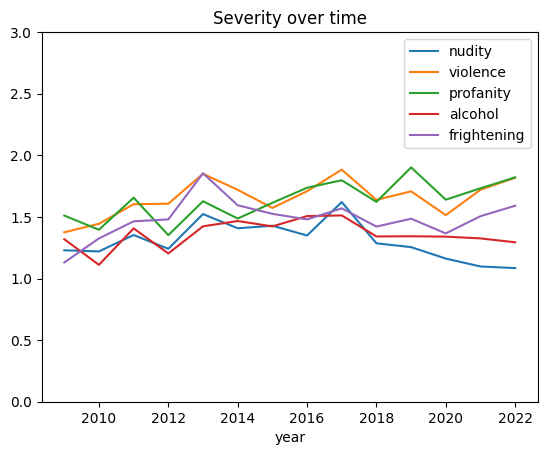

In [4]:
plot = summary.plot.line(subplots=False, xlabel='year', title='Severity over time', sharey=True, ylim=[0, 3])

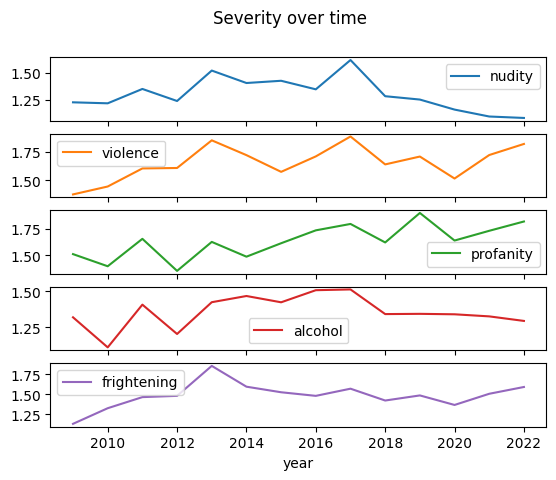

In [5]:
# Exaggerate trends
plot = summary.plot.line(subplots=True, xlabel='year', title='Severity over time')

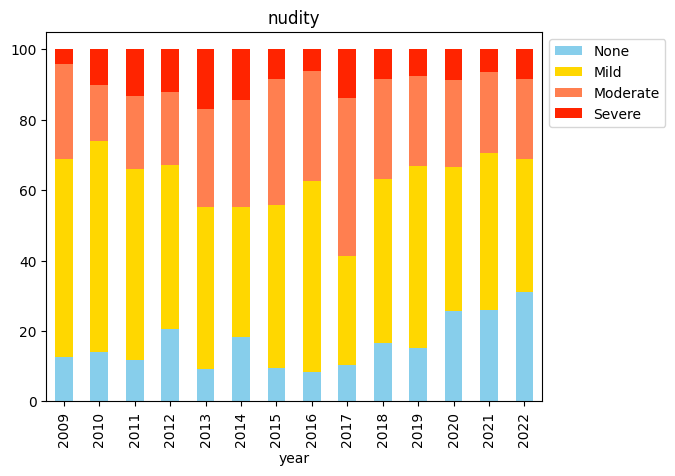

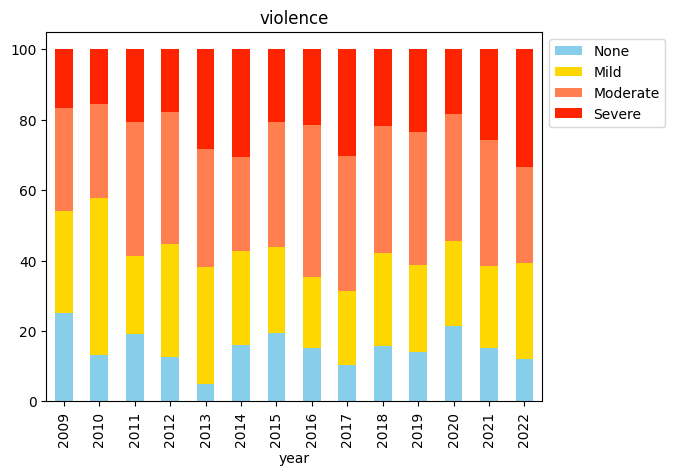

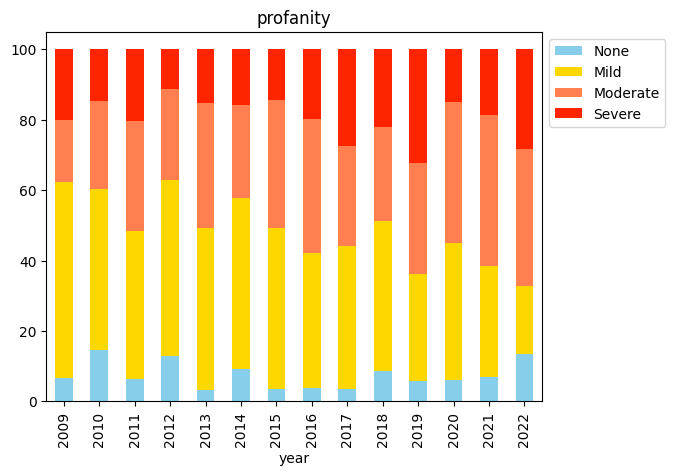

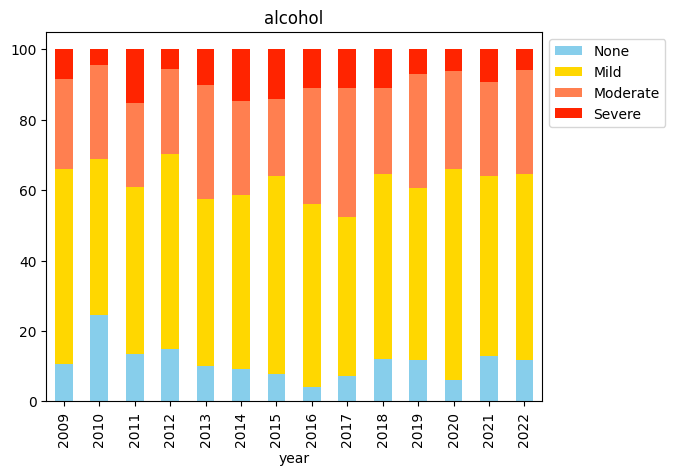

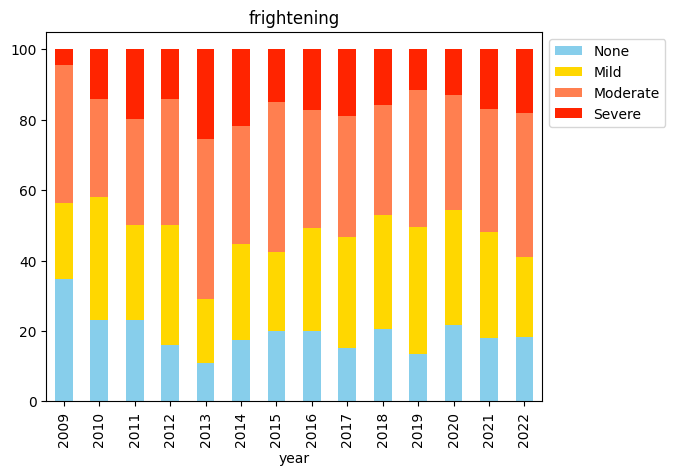

In [6]:
def plot_stacked_bar(advisory_type):
    ndf = df[['premiered', advisory_type]].value_counts().sort_index().unstack(-1)
    sev = ['None', 'Mild', 'Moderate', 'Severe']
    ndf['Total'] = ndf['None'] + ndf['Mild'] + ndf['Moderate'] + ndf['Severe']
    for s in sev:
        ndf[s] = ndf[s] / ndf['Total'] * 100
    ndf = ndf.drop(columns='Total')
    plot = ndf[['None', 'Mild', 'Moderate', 'Severe']].plot.bar(
        stacked=True, color=['#87CEEB','#FFD700','#FF7F50','#FF2400'], xlabel='year')
    plot.set_title(advisory_type)
    plot.legend(bbox_to_anchor=(1.0, 1.0))

for advisory_type in ['nudity', 'violence', 'profanity', 'alcohol', 'frightening']:
    plot_stacked_bar(advisory_type)